### Importar librerías, dataset y visualizar imágenes

In [ ]:
# Montar disco
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
# Path where the dataset is
%cd "/content/drive/MyDrive/RNN/GoogleStockPricePrediction/"

[Errno 2] No such file or directory: '/content/drive/MyDrive/DeepLearning/Proyectos/RNN/GoogleStockPricePrediction/'
/content


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
# Cargar dataset
facialexpressions = pd.read_csv("face_data.csv")
facialexpressions

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
3,2,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...
4,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...
...,...,...
24563,3,0 39 81 80 104 97 51 64 68 46 41 67 53 68 70 5...
24564,0,181 177 176 156 178 144 136 132 122 107 131 16...
24565,3,178 174 172 173 181 188 191 194 196 199 200 20...
24566,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...


Images 48x48 1 channel (greyscale)

In [ ]:
facialexpressions.columns

Index(['emotion', ' pixels'], dtype='object')

In [ ]:
# Comprobamos si hay valores nulos
facialexpressions.isnull().sum()

emotion    0
 pixels    0
dtype: int64

In [ ]:
facialexpressions[" pixels"][0]

'70 80 82 72 58 58 60 63 54 58 60 48 89 115 121 119 115 110 98 91 84 84 90 99 110 126 143 153 158 171 169 172 169 165 129 110 113 107 95 79 66 62 56 57 61 52 43 41 65 61 58 57 56 69 75 70 65 56 54 105 146 154 151 151 155 155 150 147 147 148 152 158 164 172 177 182 186 189 188 190 188 180 167 116 95 103 97 77 72 62 55 58 54 56 52 44 50 43 54 64 63 71 68 64 52 66 119 156 161 164 163 164 167 168 170 174 175 176 178 179 183 187 190 195 197 198 197 198 195 191 190 145 86 100 90 65 57 60 54 51 41 49 56 47 38 44 63 55 46 52 54 55 83 138 157 158 165 168 172 171 173 176 179 179 180 182 185 187 189 189 192 197 200 199 196 198 200 198 197 177 91 87 96 58 58 59 51 42 37 41 47 45 37 35 36 30 41 47 59 94 141 159 161 161 164 170 171 172 176 178 179 182 183 183 187 189 192 192 194 195 200 200 199 199 200 201 197 193 111 71 108 69 55 61 51 42 43 56 54 44 24 29 31 45 61 72 100 136 150 159 163 162 163 170 172 171 174 177 177 180 187 186 187 189 192 192 194 195 196 197 199 200 201 200 197 201 137 58 98 92

In [ ]:
# Transformar string en array
def string2array(a):
  array = np.array(a.split(" "))
  array = array.reshape(48,48).astype("float32")
  return array

In [ ]:
facialexpressions[" pixels"] = facialexpressions[" pixels"].apply(lambda x: string2array(x))

In [ ]:
facialexpressions[" pixels"][0]

array([[ 70.,  80.,  82., ...,  52.,  43.,  41.],
       [ 65.,  61.,  58., ...,  56.,  52.,  44.],
       [ 50.,  43.,  54., ...,  49.,  56.,  47.],
       ...,
       [ 91.,  65.,  42., ...,  72.,  56.,  43.],
       [ 77.,  82.,  79., ..., 105.,  70.,  46.],
       [ 77.,  72.,  84., ..., 106., 109.,  82.]], dtype=float32)

In [ ]:
# Dimensión de cada imagen
facialexpressions[" pixels"][0].shape

(48, 48)

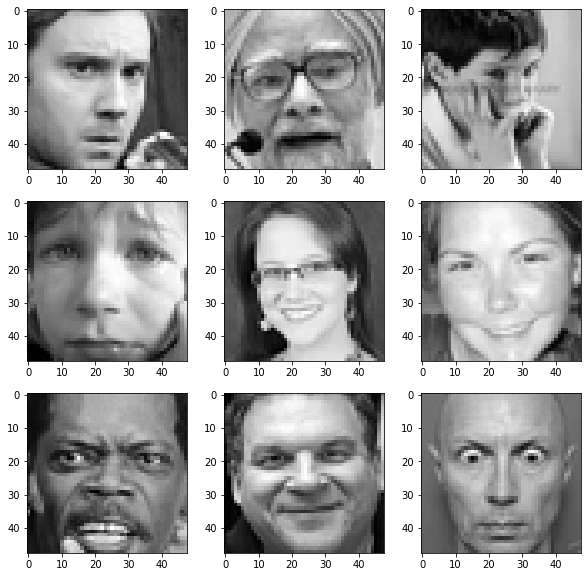

In [ ]:
fig = plt.figure(figsize=(10,10))

for i in range(9):
  ax = fig.add_subplot(3,3, i+1)
  image = facialexpressions[" pixels"][i]
  ax.imshow(image, cmap="gray")

In [ ]:
facialexpressions["emotion"].unique()

array([0, 2, 3, 4, 1])

In [ ]:
label_to_text = {0:"ira", 1:"odio", 2:"tristeza", 3:"felicidad", 4:"sorpresa"}
label_to_text

{0: 'ira', 1: 'odio', 2: 'tristeza', 3: 'felicidad', 4: 'sorpresa'}

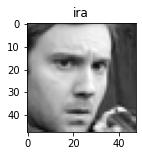

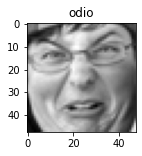

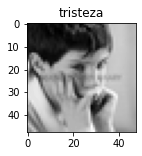

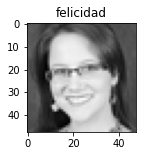

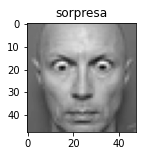

In [ ]:
emotions = [0,1,2,3,4]

for i in emotions:
  data = facialexpressions[facialexpressions["emotion"] == i][:1]
  plt.figure(figsize=(2,2))
  img = data[" pixels"].item()
  plt.imshow(img, cmap="gray")
  plt.title(label_to_text[i])

Representar un gráfico de barras para averiguar cuántas muestras (imágenes) están presentes por cada emoción

In [ ]:
facialexpressions.emotion.value_counts()

3    8989
2    6077
0    4953
4    4002
1     547
Name: emotion, dtype: int64

Text(0, 0.5, 'Number of images')

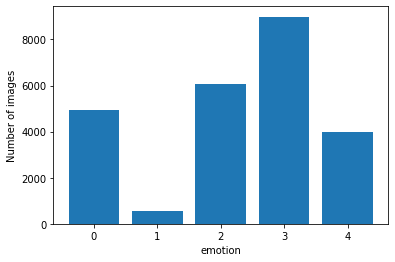

In [ ]:
plt.figure()
plt.bar(facialexpressions.emotion.value_counts().index, facialexpressions.emotion.value_counts())
plt.xlabel("emotion")
plt.ylabel("Number of images")

**Como vemos el dataset está desbalanceado ya que hay muy pocas imágenes de índice 1 (Odio) y muchas de índice 3 (Felicidad)**

Conviene hacer aumentación de imágenes en las categorías con menos imágenes, para obtener más imágenes

### Aumentación de las imágenes

In [ ]:
from tensorflow.keras.utils import to_categorical

X = facialexpressions[" pixels"]
y = to_categorical(facialexpressions["emotion"])

In [ ]:
X.shape, y.shape

((24568,), (24568, 5))

In [ ]:
X[0].shape

(48, 48)

In [ ]:
X = np.stack(X, axis=0)
X.shape

(24568, 48, 48)

In [ ]:
# Añado la dimensión del canal (grayscale)
X = X.reshape(24568, 48, 48, 1)
X.shape, y.shape

((24568, 48, 48, 1), (24568, 5))

In [ ]:
# Dividir el dataframe en conjunto de entrenamiento y test validación
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, shuffle=True)

80% del dataset para entrenamiento

10% del dataset para validación

10% del dataset para testing

In [ ]:
X_val.shape, X_test.shape

((2457, 48, 48, 1), (2457, 48, 48, 1))

In [ ]:
#Normalizar los datos
#X_train = X_train/255.0 # Incluido en el ImageDataGenerator con "rescale".
X_val = X_val/255.0
X_test = X_test/255.0



In [ ]:
X_train[0]

array([[[200.],
        [189.],
        [132.],
        ...,
        [ 53.],
        [119.],
        [168.]],

       [[197.],
        [187.],
        [167.],
        ...,
        [ 31.],
        [ 90.],
        [139.]],

       [[191.],
        [181.],
        [163.],
        ...,
        [  8.],
        [ 68.],
        [119.]],

       ...,

       [[ 28.],
        [ 25.],
        [ 24.],
        ...,
        [ 98.],
        [ 79.],
        [ 45.]],

       [[ 27.],
        [ 25.],
        [ 24.],
        ...,
        [  3.],
        [  1.],
        [  3.]],

       [[ 24.],
        [ 24.],
        [ 25.],
        ...,
        [ 15.],
        [ 15.],
        [ 14.]]], dtype=float32)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range = 0.1, #Desplazamiento horizontal de hasta un 10% del tamaño de la imágen
    height_shift_range = 0.1,
    shear_range = 0.1,
    zoom_range = 0.1,
    horizontal_flip = True,
    vertical_flip = True,
    #brightness_range = [1.1, 1.5], #Multiplicar píxeles por este rango de valores
    fill_mode = "nearest",
    rescale = 1/255.0
)

In [ ]:
X_train.shape, X_val.shape, X_test.shape

((19654, 48, 48, 1), (2457, 48, 48, 1), (2457, 48, 48, 1))

In [ ]:
train_data = train_datagen.flow(X_train, y_train, batch_size=32)

In [ ]:
len(train_data)

615

In [ ]:
# Get a sample of the training data batch 
images, labels = train_data.next() # get the 'next' batch of images/labels
len(images), len(labels)

(32, 32)

In [ ]:
images[0], images[0].shape

(array([[[0.29531184],
         [0.28771985],
         [0.2944832 ],
         ...,
         [0.8262828 ],
         [0.83498204],
         [0.8436813 ]],
 
        [[0.2973333 ],
         [0.28839365],
         [0.29246175],
         ...,
         [0.881383  ],
         [0.8752183 ],
         [0.8671882 ]],
 
        [[0.30368978],
         [0.306469  ],
         [0.33239427],
         ...,
         [0.8314175 ],
         [0.8207107 ],
         [0.8100039 ]],
 
        ...,
 
        [[0.68235296],
         [0.68235296],
         [0.6899265 ],
         ...,
         [0.3461334 ],
         [0.34901962],
         [0.34901962]],
 
        [[0.68235296],
         [0.68235296],
         [0.6885788 ],
         ...,
         [0.34343812],
         [0.34901962],
         [0.34901962]],
 
        [[0.68235296],
         [0.68235296],
         [0.6872312 ],
         ...,
         [0.34074286],
         [0.34901962],
         [0.34901962]]], dtype=float32), (48, 48, 1))

In [ ]:
X_val[0], X_test[0]

(array([[[0.45490196],
         [0.45882353],
         [0.4392157 ],
         ...,
         [0.7607843 ],
         [0.7294118 ],
         [0.7647059 ]],
 
        [[0.43529412],
         [0.43529412],
         [0.42352942],
         ...,
         [0.6509804 ],
         [0.6862745 ],
         [0.70980394]],
 
        [[0.39215687],
         [0.39215687],
         [0.39215687],
         ...,
         [0.5568628 ],
         [0.64705884],
         [0.61960787]],
 
        ...,
 
        [[0.11764706],
         [0.1254902 ],
         [0.12941177],
         ...,
         [0.57254905],
         [0.7254902 ],
         [0.7764706 ]],
 
        [[0.12156863],
         [0.12156863],
         [0.12941177],
         ...,
         [0.5529412 ],
         [0.69803923],
         [0.77254903]],
 
        [[0.12156863],
         [0.11764706],
         [0.13333334],
         ...,
         [0.54509807],
         [0.6745098 ],
         [0.78039217]]], dtype=float32), array([[[0.78039217],
         [0.796078

### Modelo para la clasificación de expresiones faciales

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam

In [ ]:
X_train[0].shape

(48, 48, 1)

In [ ]:
# 69% accuracy. 1,273,861 parameters
model = Sequential([
    
    Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu", input_shape=(48,48,1)), # Input layer (specify input shape)
    MaxPooling2D(pool_size=(2,2)),
    #Dropout(0.25),

    Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"), 
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),

    Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPooling2D(pool_size=(2,2)),
    #Dropout(0.25),

    Flatten(),
    
    Dense(256, activation="relu"),
    Dropout(0.25),
    Dense(5, activation="softmax")
])

model.compile(loss='categorical_crossentropy',
                optimizer=Adam(learning_rate=0.001),
                metrics=['accuracy'])
model.summary()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_83 (Conv2D)          (None, 48, 48, 32)        320       
                                                                 
 max_pooling2d_82 (MaxPoolin  (None, 24, 24, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_84 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_83 (MaxPoolin  (None, 12, 12, 64)       0         
 g2D)                                                            
                                                                 
 dropout_81 (Dropout)        (None, 12, 12, 64)        0         
                                                                 
 conv2d_85 (Conv2D)          (None, 12, 12, 128)     

In [ ]:
history = model.fit(train_data, epochs=20, steps_per_epoch=len(train_data), validation_data=(X_val, y_val))

Epoch 1/20
615/615 [==============================] - 11s 17ms/step - loss: 1.3981 - accuracy: 0.3657 - val_loss: 1.2996 - val_accuracy: 0.4371
Epoch 2/20
615/615 [==============================] - 10s 16ms/step - loss: 1.3311 - accuracy: 0.4184 - val_loss: 1.2312 - val_accuracy: 0.4949
Epoch 3/20
615/615 [==============================] - 10s 16ms/step - loss: 1.2751 - accuracy: 0.4542 - val_loss: 1.1959 - val_accuracy: 0.5006
Epoch 4/20
615/615 [==============================] - 10s 16ms/step - loss: 1.2010 - accuracy: 0.4950 - val_loss: 1.0846 - val_accuracy: 0.5458
Epoch 5/20
615/615 [==============================] - 10s 16ms/step - loss: 1.1375 - accuracy: 0.5263 - val_loss: 1.0165 - val_accuracy: 0.5926
Epoch 6/20
615/615 [==============================] - 10s 16ms/step - loss: 1.0872 - accuracy: 0.5532 - val_loss: 0.9559 - val_accuracy: 0.6133
Epoch 7/20
615/615 [==============================] - 10s 17ms/step - loss: 1.0438 - accuracy: 0.5770 - val_loss: 0.9330 - val_accuracy:

In [ ]:
eval = model.evaluate(X_test, y_test, batch_size=32)
print("test loss, test acc:", eval)

77/77 [==============================] - 0s 4ms/step - loss: 0.7666 - accuracy: 0.6976
test loss, test acc: [0.766626238822937, 0.6975986957550049]


In [ ]:
# Save the model
model.save("saved_trained_model_70%")

INFO:tensorflow:Assets written to: saved_trained_model_70%/assets


In [ ]:
# Load in a model and evaluate it
model = tf.keras.models.load_model("saved_trained_model_70%")
model.evaluate(X_test, y_test, batch_size=32)

77/77 [==============================] - 1s 4ms/step - loss: 0.7666 - accuracy: 0.6976


[0.766626238822937, 0.6975986957550049]

### Evaluar el modelo

In [ ]:
# Plot the validation and training data separately
def plot_loss_accuracy_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  # Plot loss
  plt.plot(epochs, loss, label = "training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend()

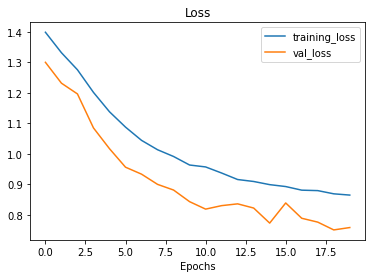

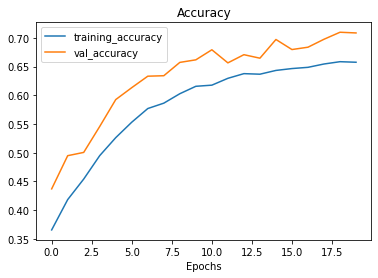

In [ ]:
plot_loss_accuracy_curves(history)

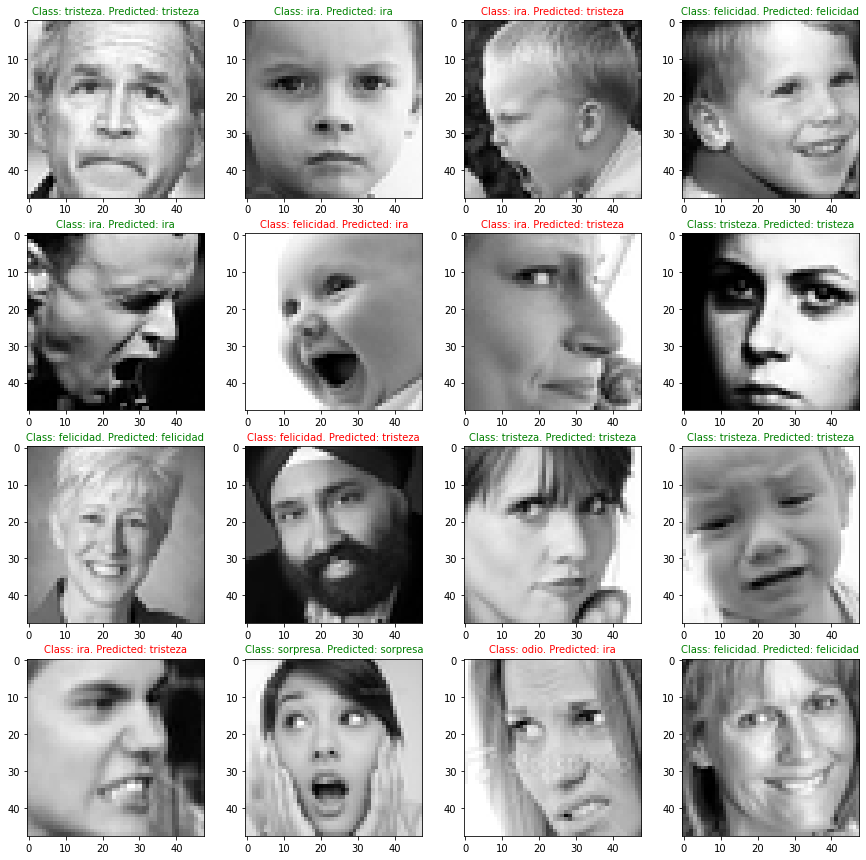

In [ ]:
fig = plt.figure(figsize=(15,15))

for i in range(16):
  ax = fig.add_subplot(4,4, i+1)
  image = X_test[i].reshape(48,48)
  ax.imshow(image,cmap="gray")
  image = np.expand_dims(image, axis=0) # 1 imagen de 48x48 (1,48,48)
  pred = model.predict(image)
  color = "green"
  if y_test[i].argmax() != pred.argmax():
    color = "red"
  plt.title("Class: "+ label_to_text[y_test[i].argmax()] + ". Predicted: " + label_to_text[pred.argmax()], fontsize=10, color=color)
